# DeepLearning nagyHF I. milestone
## Team - balit_learning : Gurubi Barnabás - DXEXVR, Mátyás Gergely - IL21NI, Horváth Ákos - DKILK6

## Problem: Colorizing black and white pictures (with user interactions)

We would like to create a neural network which is able to colorize black and white pictures. In adition to this we would like to provide a possibility for the user to change the result (colorized) image by giving the color of certain points in the original (black and white) image. For this problem there are a lot of articles that helped us to take the first steps.

   * https://arxiv.org/abs/1705.02999 -Real-Time User-Guided Image Colorization with Learned Deep Priors
   * https://blog.floydhub.com/colorizing-b-w-photos-with-neural-networks/ (this is ablog not a scientific paper but it 
     explains the basics well
   * https://arxiv.org/pdf/1603.08511.pdf - Colorful Image Colorization
   * http://cs231n.stanford.edu/reports/2016/pdfs/205_Report.pdf - CS231N Project: Coloring black and white world using Deep 
     Neural Nets
    
First we saw that we would need a large database of random images. We found and edited a script that enabled us to download  around 100k random images from the site: https://pixabay.com/. 
In this script we also cut and resize all the pictures so all of them are 224x224 pixels. 


```python
import re
import requests
from bs4 import BeautifulSoup

from PIL import Image
from resizeimage import resizeimage
from io import BytesIO

count = 0
    
for i in range(5, 7) :
    site = 'https://pixabay.com/hu/photos/?&pagi='  + str(i)

    response = requests.get(site)

    soup = BeautifulSoup(response.text, 'html.parser')
    img_tags = soup.find_all('img')

    urls = [img['src'] for img in img_tags]
    
    for url in urls:
        filename = re.search(r'/([\w_-]+[.](jpg|gif|png))$', url)
        if ((not '.gif' in filename.group(1)) and (not '.png' in filename.group(1))):
            with open(filename.group(1), 'wb') as file:
                if 'http' not in url:
                    url = '{}{}'.format(site, url)
                response = requests.get(url)
                img = Image.open(BytesIO(response.content))
                img = resizeimage.resize_cover(img, [224, 224])
                img.save(file, "JPEG")
    print(i)

```

### Datasets
We have also found a Kaggle dataset, which containts 25k 224x224 images, already split into Lab channels.
https://www.kaggle.com/shravankumar9892/image-colorization

The other dataset of images have to be split into channels by us, we do this preprocess with the scripts given hereunder. After the preprocess we uploaded them.

#### TODO LINK

### Loading and formatting pictures
So now that we downloaded the database, we need to load it to our program and format them. As we read in a lot of articles for this problem it is better if we change the usual RGB channels to Lab representation. (where L is for lightness, a and b are for the color spectrums green–red and blue–yellow) This way the L channel will provide us the black and white pictures which represent the input and the network has to predict the a and b values. Also it is better for the network if the values are between 0 and 1 so we 'normalized' them. (we know that L is between  0-100 and a,b are between -128 - 128 )

In [23]:
## TODO - ide kellene a kód (betöltés, Lab ba írás, szétválasztás hogy a fekete fehér az input)

import os
from os import listdir
from PIL import Image as PImage
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



%matplotlib inline

def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

path = os.getcwd() + '/dataset/'

# your images in an array
imgs = loadImages(path)

#showing first 4 pictures
figure = plt.figure(figsize=(18, 16))
mtxs = []
for i in range(8,11):
    img = imgs[i]
    mtxs.append(np.asarray(img,dtype = "float32"))
    figure.add_subplot(1,3,len(mtxs))  
    plt.imshow(img)
plt.show()

OSError: cannot identify image file '/Users/matyasg/dataset/imgs.npy'

As we see now they are in RGB channels:

In [2]:
mtxs[0]

array([[[ 109.,   94.,  101.],
        [ 125.,  110.,  117.],
        [ 120.,  105.,  112.],
        ..., 
        [  47.,   48.,   42.],
        [  46.,   47.,   41.],
        [  45.,   46.,   40.]],

       [[ 108.,   93.,  100.],
        [ 112.,   97.,  104.],
        [ 114.,   99.,  106.],
        ..., 
        [  46.,   47.,   41.],
        [  45.,   46.,   40.],
        [  44.,   45.,   39.]],

       [[ 108.,   93.,  100.],
        [ 106.,   91.,   96.],
        [ 103.,   88.,   93.],
        ..., 
        [  46.,   47.,   41.],
        [  44.,   45.,   39.],
        [  43.,   44.,   38.]],

       ..., 
       [[  94.,   89.,   86.],
        [  93.,   88.,   85.],
        [  88.,   80.,   78.],
        ..., 
        [  96.,  122.,   59.],
        [  96.,  122.,   59.],
        [  96.,  122.,   59.]],

       [[  88.,   83.,   80.],
        [  86.,   81.,   78.],
        [  80.,   72.,   70.],
        ..., 
        [  96.,  122.,   59.],
        [  96.,  122.,   59.],
        [ 

# Converting to Lab
With the help of skimage lib we can convert them to Lab channels.

In [19]:
from skimage import color

imgsinLab = []
for img in imgs:
    imgsinLab.append(color.rgb2lab(img))

NameError: name 'imgs' is not defined

After the pictures were converted, we can plot them channel by channel, helping the visualization. These pictures of the channels aren't showing the ground truth, because of the nature of the Lab representation. Since the L channel is for lightness, hence the a and b channels plotted on their own will be very dark (as the L value is 0). That is why we added the half of the original L value to these channels, thus the result image is more enjoyable.

In [18]:
figure = plt.figure(figsize=(18, 16))
mtxs = []

for ch in range(0,3):
    for i in range(8,11):
        lab_img = imgsinLab[i]
        tmp = np.zeros(lab_img.shape)
        
        tmp[:,:,ch] = lab_img[:,:,ch]
        
        if ch != 0:
            tmp[:,:,0] = lab_img[:,:,0] / 2
        
        tmp = color.lab2rgb(tmp)

        mtxs.append(np.asarray(tmp,dtype = "float32"))
        figure.add_subplot(3,3,len(mtxs))  
        plt.imshow(tmp)
plt.show()

NameError: name 'imgsinLab' is not defined

<Figure size 1296x1152 with 0 Axes>

### Generating user inputs for the learning

As we would like to provide users the chance to change the colorization we need to teach this to our network.For this we read a very good idea in a paper, how they solved this problem (Real-Time User-Guided Image Colorization with Learned Deep Priors - https://arxiv.org/abs/1705.02999). So we generated random user inputs for each pictures and added them as inputs as well. (for this we just used random points from each pictures with the original color as if the user had given them)

First we choose 10 random pixels. (The picture is in rgb color space, due to the plotting)

In [5]:
import random

rgb_image = color.lab2rgb(imgsinLab[10])

rnd_pixels = []
rnd_nums_x = random.sample(range(0, 224), 20)
rnd_nums_y = random.sample(range(0, 224), 20)

for i in range(0, 20):
    rnd_pixels.append(rgb_image[rnd_nums_y[i], rnd_nums_x[i]])
    
rnd_pixels

[array([ 0.97647059,  0.27843137,  0.57647059]),
 array([ 0.14901961,  0.1254902 ,  0.        ]),
 array([ 0.98823529,  0.62745098,  0.82745098]),
 array([ 0.74117647,  0.31372549,  0.46666667]),
 array([ 1.        ,  0.7254902 ,  0.84313725]),
 array([ 0.84313725,  0.00392157,  0.24705882]),
 array([ 0.99215686,  0.36078431,  0.7254902 ]),
 array([ 0.79607843,  0.01568627,  0.17647059]),
 array([ 0.32156863,  0.33333333,  0.03137255]),
 array([ 1.        ,  0.71764706,  0.84313725]),
 array([ 0.90980392,  0.51372549,  0.67058824]),
 array([  5.80392157e-01,   3.58602037e-16,   2.58823529e-01]),
 array([ 0.96470588,  0.39215686,  0.53333333]),
 array([ 0.91372549,  0.48235294,  0.58039216]),
 array([ 0.97647059,  0.44705882,  0.61568627]),
 array([ 0.98431373,  0.        ,  0.20784314]),
 array([ 1.        ,  0.50196078,  0.74509804]),
 array([ 0.31764706,  0.30588235,  0.00392157]),
 array([ 0.97254902,  0.50588235,  0.71764706]),
 array([ 0.37254902,  0.4       ,  0.03529412])]

### Portraying the random pixels

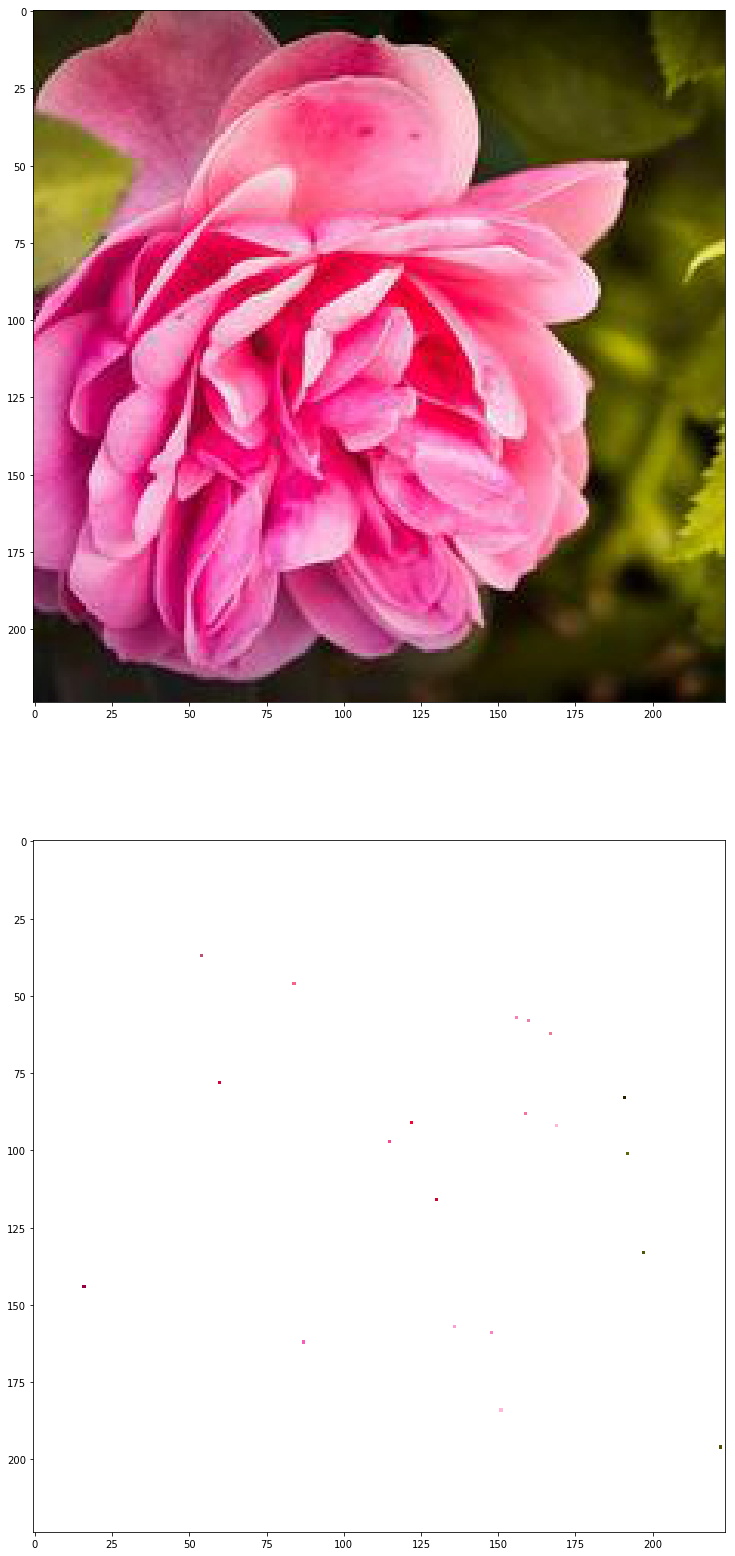

In [6]:
rnd_image = np.zeros(rgb_image.shape)

rnd_image[:,:,:] = [1, 1, 1]

for i in range(0, 20):
    rnd_image[rnd_nums_y[i], rnd_nums_x[i]] = rnd_pixels[i]
    
figure = plt.figure(figsize=(30, 28))
mtxs = []

mtxs.append(np.asarray(rgb_image, dtype = "float32"))
figure.add_subplot(2,1,len(mtxs))  
plt.imshow(rgb_image)

mtxs.append(np.asarray(rnd_image, dtype = "float32"))
figure.add_subplot(2,1,len(mtxs))  
plt.imshow(rnd_image)

plt.show()

### Normalizing the Lab channels (0...1)

In [7]:
#TODO leosztani a megfelelő számokkal hogy 0 és 1 közé essenek 
#L - 0-100
#a,b - -128 -- +128

for i in range(0, len(imgsinLab)):
    imgsinLab[i][:,:,0] /= 100
    imgsinLab[i][:,:,1] += 128
    imgsinLab[i][:,:,1] /= 256
    imgsinLab[i][:,:,2] += 128
    imgsinLab[i][:,:,2] /= 256

## Save and load the images from the npy files

In [8]:
np.save("imgs.npy", imgsinLab)

In [4]:
loaded_images = np.load("imgs.npy")

## Creating the train, test and validation set

The last step is to divide the dataset into train, test and validation sets. For this we used a 
distribution of:
* 70% train
* 20% validation
* 10% test 


In [51]:
## TODO - train, test, valid elosztás
valid_split = 0.2
test_split = 0.1
nb_samples = 47
    
imgs_train = loaded_images[0:int(nb_samples*(1-valid_split-test_split))]
imgs_valid = loaded_images[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
imgs_test  = loaded_images[int(nb_samples*(1-test_split)):]

X_train = imgs_train[:,:,:,0]
Ya_train = imgs_train[:,:,:,1]
Yb_train = imgs_train[:,:,:,2]

X_valid = imgs_valid[:,:,:,0]
Ya_valid = imgs_valid[:,:,:,1]
Yb_valid = imgs_valid[:,:,:,2]

X_test = imgs_test[:,:,:,0]
Ya_test = imgs_test[:,:,:,1]
Yb_test = imgs_test[:,:,:,2]

##print(loaded_images.shape)
##print(X_train.shape)

(47, 224, 224, 3)
(32, 224, 224)
